# <font color='red'> Project 1

### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

### Reading the Data from Data files 

In [1]:
## Importin Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR,SVR
import warnings
warnings.filterwarnings('ignore')

import mglearn as mglearn
%matplotlib inline 

In [2]:
### Importing the data 

audit = pd.read_csv('audit_risk.csv')

In [3]:
audit.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [5]:
trial = pd.read_csv('trial.csv')

In [6]:
trial.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      1
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64

In [7]:
audit['Money_Value'].fillna(0, inplace = True)

In [8]:
trial['Money_Value'].fillna(0, inplace = True)

In [9]:
print("Audit \n", audit.isnull().sum())
print("Trial \n",trial.isnull().sum())

Audit 
 Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64
Trial 
 Sector_score     0
LOCATION_ID      0
PARA_A           0
SCORE_A          0
PARA_B           0
SCORE_B          0
TOTAL            0
numbers          0
Marks            0
Money_Value      0
MONEY_Marks      0
District         0
Loss             0
LOSS_SCORE       0
History          0
History_score    0
Score            0
Risk             0
dtype: int64


In [10]:
audit_risk = pd.merge(audit,trial, left_index=True, right_index=True,how = 'inner',suffixes=('', ' '))

In [11]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                
    return list(duplicateColumnNames)

In [12]:
duplicateColumnNames = getDuplicateColumns(audit_risk)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  TOTAL 
Column name :  Money_Value 
Column name :  Score 
Column name :  numbers 
Column name :  History 
Column name :  PARA_A 
Column name :  District
Column name :  PARA_B 
Column name :  Sector_score 
Column name :  LOCATION_ID 


In [13]:
audit_risk = audit_risk.drop(columns=getDuplicateColumns(audit_risk))

In [14]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 35 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

Converting and imputing values for ``LOCATION_ID`` 

In [15]:
audit_risk['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [16]:
audit_risk.LOCATION_ID.replace(['LOHARU', 'NUH', 'SAFIDON'], ['45', '46', '47'], inplace=True)

In [17]:
audit_risk['LOCATION_ID'] = audit_risk['LOCATION_ID'].astype(np.int64)

In [18]:
audit_risk[:10][['Score_A', 'Score_B', 'SCORE_A', 'SCORE_B']]

,Score_A,Score_B,SCORE_A,SCORE_B
0,0.6,0.2,6,2
1,0.2,0.2,2,2
2,0.2,0.2,2,2
3,0.2,0.6,2,6
4,0.2,0.2,2,2
5,0.2,0.2,2,2
6,0.4,0.4,4,4
7,0.6,0.6,6,6
8,0.6,0.6,6,6
9,0.6,0.2,6,2


As Columns ``Score_A, Score_B`` and ``SCORE_A, SCORE_B`` are similar and related as ``SCORE_* = 10 * Score_*`` So we can drop both ``SCORE_A`` and ``SCORE_B`` columns 

In [19]:
audit_risk = audit_risk.drop(['SCORE_A', 'SCORE_B'], axis = 1)

In [20]:
audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 33 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null int64
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       776 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CONT

### Feature Scaling
- Standard 
As we see most of the features are not skewed and displays bimodal tranfromation so the ``Standard scaling`` will be appropriate for this type of data 

In [21]:
y_org = audit_risk['Audit_Risk']
X_org = audit_risk.drop(columns='Audit_Risk')

In [22]:
X_train_org, X_test_org , y_train, y_test  = train_test_split(X_org, y_org, random_state = 0)

In [23]:
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [24]:
model_Scores = []

## Regression Tasks
##  - Linear Regression 

In [25]:
def printGridResult (model_def) :
    print("Best CV result: {}".format(model_def.best_score_))
    print("Best parameters: {}".format(model_def.best_params_))
    print("Training Score: {}".format(model_def.score(X_train, y_train)))
    print("Testing Score: {}".format(model_def.score(X_test, y_test)))

In [26]:
lreg = LinearRegression()
cvscores = cross_val_score(lreg, X_train, y_train, cv=3)
print("Cross validation scores: {}".format(cvscores))
print("Train Score {:.2f}".format(cvscores.mean()))
lreg.fit(X_train, y_train)
test_score = lreg.score(X_test,y_test) 
print("Test Score {:.2f}".format(test_score))

Cross validation scores: [0.768236   0.83440621 0.72379217]
Train Score 0.78
Test Score 0.49


In [27]:
## Appending the results 
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Linear Regression',
                    'Parameters' : '-',
                    'Training_score': cvscores.mean(),
                    'Test Score':test_score})

## Stocastic Gradiant Descent Regressor( SGD Regressor)

In [28]:
## As SGD has Parameters using GridSearchCV
sgd_param = {'max_iter': [10, 100, 1000],'learning_rate':['optimal'], 'penalty' :['l1','l2'],'random_state':[0]}

print("Parameter grid for GridSearch CV :\n{}".format(sgd_param))

sgd_GSCV =  GridSearchCV(estimator = SGDRegressor(), 
                         param_grid= sgd_param, cv = 3, n_jobs=1, return_train_score = True)
sgd_GSCV.fit(X_train,y_train)

Parameter grid for GridSearch CV :
{'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]}


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
printGridResult(sgd_GSCV)
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'SGD Regressor',
                    'Parameters' : sgd_GSCV.best_params_,
                    'Training_score': sgd_GSCV.score(X_train, y_train),
                    'Test Score':sgd_GSCV.score(X_test, y_test)})

Best CV result: -1.5434835534850598e+21
Best parameters: {'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0}
Training Score: -8.065765935990329e+19
Testing Score: -2.2746508481862536e+18


## Polynomial Regression

Train Scores [0.7754781269974481, 0.9582140413383881, 0.6918031332804967]
Test Scores [0.4865740275997731, 0.9986868081827037, -0.9097913793434518]


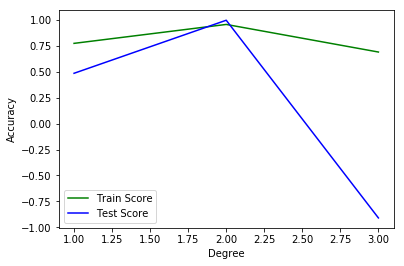

In [30]:
polyreg = LinearRegression()
poly_train_score = []
poly_test_score = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    scores_train = cross_val_score(polyreg, X_train_poly, y_train, cv=3)
    polyreg.fit(X_train_poly,y_train)
    scores_test = polyreg.score(X_test_poly,y_test)
    poly_test_score.append(scores_test)
    poly_train_score.append(scores_train.mean())

print("Train Scores", poly_train_score)
print("Test Scores", poly_test_score)

%matplotlib inline
x_axis = range(1,4)
plt.plot(x_axis, poly_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, poly_test_score, c = 'b', label = 'Test Score')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Polynomial Regression',
                    'Parameters' : {'Degree':2},
                    'Training_score':poly_train_score[1],
                    'Test Score':poly_test_score[1]})

In [38]:
print(np.logspace(-3, 3, 13))

[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03]


## Ridge Regression (L2)

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


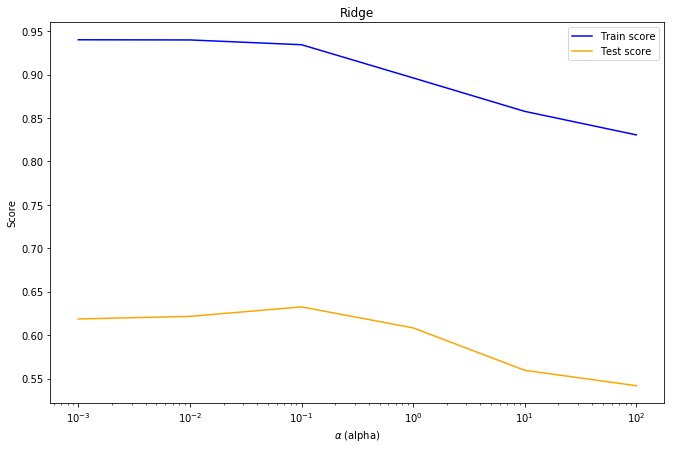

In [39]:
ridgeParamGSV = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(ridgeParamGSV))

ridgeGridSV = GridSearchCV(estimator = Ridge(random_state = 0 ),param_grid = ridgeParamGSV, 
                           cv=5, return_train_score=True, scoring='r2', n_jobs=1)
ridgeGridSV.fit(X_train, y_train)

ridge_train_scores_mean = ridgeGridSV.cv_results_["mean_train_score"]
ridge_test_scores_mean = ridgeGridSV.cv_results_["mean_test_score"]
plt.figure(figsize = (11,7))
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx([0.001, 0.01, 0.1, 1, 10, 100], ridge_train_scores_mean, label='Train score',
             color='blue')
plt.semilogx([0.001, 0.01, 0.1, 1, 10, 100], ridge_test_scores_mean,
             label='Test score', color='orange')

plt.title('Ridge')
plt.legend(loc='best')
plt.show()

In [40]:
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Ridge Regression',
                    'Parameters' : ridgeGridSV.best_params_,
                    'Training_score': ridgeGridSV.score(X_train, y_train),
                    'Test Score': ridgeGridSV.score(X_test, y_test )})
printGridResult(ridgeGridSV)

Best CV result: 0.6325296095161187
Best parameters: {'alpha': 0.1}
Training Score: 0.9316139625480443
Testing Score: 0.45995591733805796


## Lasso Regression (L1)

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


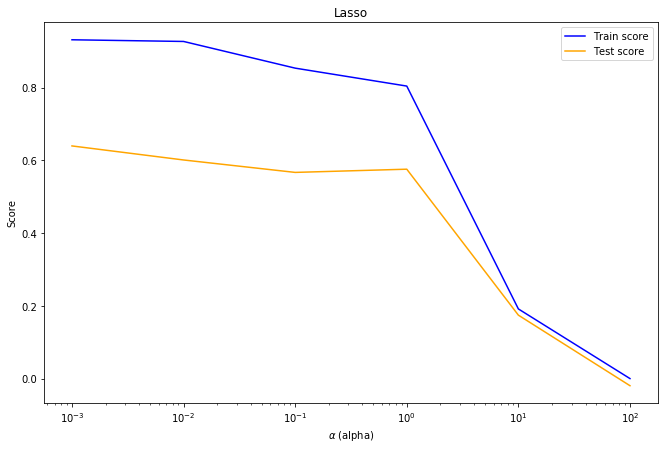

In [41]:

lassoParamGSV = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(lassoParamGSV))

lassoGridSV = GridSearchCV(estimator = Lasso(random_state = 0 ),param_grid = lassoParamGSV, 
                           cv=5, return_train_score=True, scoring='r2', n_jobs=1)
lassoGridSV.fit(X_train, y_train)

lasso_train_scores_mean = lassoGridSV.cv_results_["mean_train_score"]
lasso_test_scores_mean = lassoGridSV.cv_results_["mean_test_score"]
plt.figure(figsize = (11,7))
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx([0.001, 0.01, 0.1, 1, 10, 100], lasso_train_scores_mean, label='Train score',
             color='blue')
plt.semilogx([0.001, 0.01, 0.1, 1, 10, 100], lasso_test_scores_mean,
             label='Test score', color='orange')

plt.title('Lasso')
plt.legend(loc='best')


In [42]:
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Lasso Regression',
                    'Parameters' : lassoGridSV.best_params_,
                    'Training_score': lassoGridSV.score(X_train, y_train),
                    'Test Score': lassoGridSV.score(X_test, y_test )})
printGridResult(lassoGridSV)

Best CV result: 0.639486329137217
Best parameters: {'alpha': 0.001}
Training Score: 0.9250519206887224
Testing Score: 0.4536240545871546


### KNN Regressor 

Parameter grid:
{'n_neighbors': [1, 5, 10, 15, 20]}


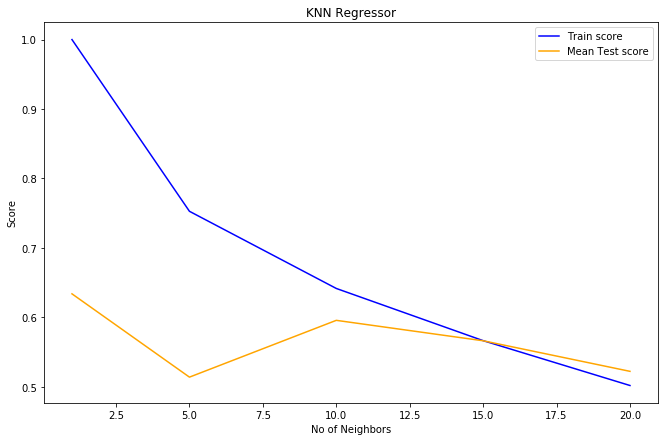

In [43]:
knnRegressor = KNeighborsRegressor()
noofNeighbors = {'n_neighbors':[1, 5, 10, 15, 20]}
print("Parameter grid:\n{}".format(noofNeighbors))
knnGridSCV = GridSearchCV(knnRegressor, param_grid = noofNeighbors, cv=5, return_train_score=True)
knnGridSCV.fit(X_train, y_train)

n_neighbors = [1, 5, 10, 15, 20]

n_neighbors = [1, 5, 10, 15, 20]

train_knnRegressor = knnGridSCV.cv_results_["mean_train_score"]

test_knnRegressor = knnGridSCV.cv_results_["mean_test_score"]


plt.figure(figsize = (11,7))
plt.title('KNN Regressor')
plt.xlabel('No of Neighbors')
plt.ylabel('Score')
plt.plot(n_neighbors, train_knnRegressor, label='Train score',
             color='blue')
plt.plot(n_neighbors, test_knnRegressor,
             label='Mean Test score', color='orange')

plt.legend(loc='best')
plt.show()

In [44]:
printGridResult(knnGridSCV)

model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'KNN Regressor',
                    'Parameters' : knnGridSCV.best_params_,
                    'Training_score': knnGridSCV.score(X_train, y_train),
                    'Test Score': knnGridSCV.score(X_test, y_test )})


Best CV result: 0.6339122685851112
Best parameters: {'n_neighbors': 1}
Training Score: 1.0
Testing Score: 0.1347607930843645


### LinearSVR

In [45]:
linearSVM = LinearSVR(random_state=0)
linearSVMparam = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Parameter grid:\n{}".format(linearSVMparam))
linearSVMGridSV = GridSearchCV(linearSVM, param_grid = linearSVMparam, cv=5, return_train_score=True)
linearSVMGridSV.fit(X_train, y_train)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

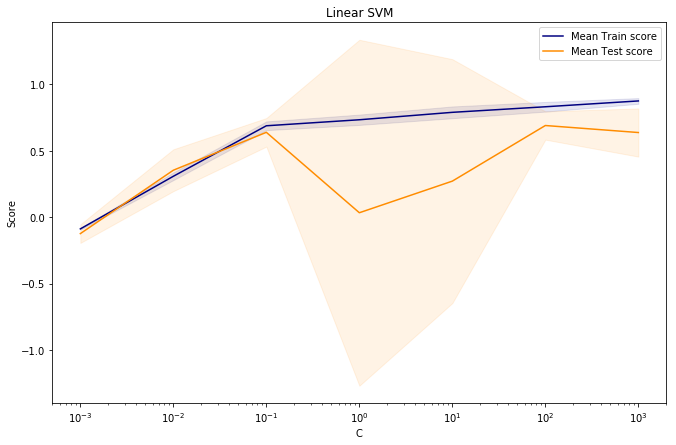

In [46]:
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
linearSVM_train_mean = linearSVMGridSV.cv_results_["mean_train_score"]
linearSVM_train_std = linearSVMGridSV.cv_results_["std_train_score"]
linearSVM_test_mean = linearSVMGridSV.cv_results_["mean_test_score"]
linearSVM_test_std = linearSVMGridSV.cv_results_["std_test_score"]

plt.figure(figsize = (11,7))
plt.title('Linear SVM')
plt.xlabel('C')
plt.ylabel('Score')
# plot train scores
plt.semilogx(C, linearSVM_train_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       linearSVM_train_mean - linearSVM_train_std,
                       linearSVM_train_mean + linearSVM_train_std,
                       alpha = 0.1,
                       color='navy')
plt.semilogx(C, linearSVM_test_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(C,
                       linearSVM_test_mean - linearSVM_test_std,
                       linearSVM_test_mean + linearSVM_test_std,
                       alpha = 0.1,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [47]:
printGridResult(linearSVMGridSV)

model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Linear SVM',
                    'Parameters' : linearSVMGridSV.best_params_,
                    'Training_score': linearSVMGridSV.score(X_train, y_train),
                    'Test Score': linearSVMGridSV.score(X_test, y_test )})

Best CV result: 0.6905213607315606
Best parameters: {'C': 100}
Training Score: 0.8564434535830807
Testing Score: 0.4380512698614668


### SVM with Radial Kernal

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


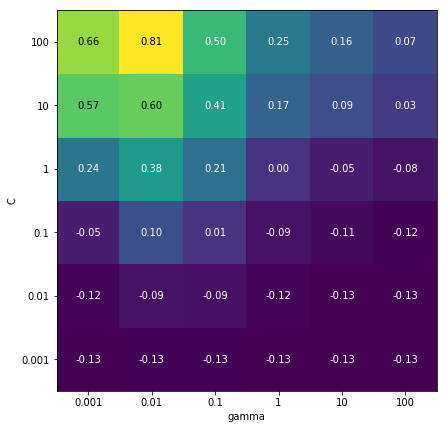

In [48]:
svmRadial = SVR(kernel = 'rbf')
param_Radial_SVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_Radial_SVM))
svmRadialGridSV  = GridSearchCV(svmRadial, param_grid = param_Radial_SVM, cv=5, return_train_score=True)

svmRadialGridSV.fit(X_train, y_train)

svmRadialGridSV_results = pd.DataFrame(svmRadialGridSV.cv_results_)
%matplotlib inline
scores = np.array(svmRadialGridSV_results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
plt.figure(figsize = (11,7))
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_Radial_SVM['gamma'], ylabel='C', yticklabels=param_Radial_SVM['C'])
plt.figure
plt.show()

In [49]:
printGridResult(svmRadialGridSV)
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'SVM Radial',
                    'Parameters' : svmRadialGridSV.best_params_,
                    'Training_score': svmRadialGridSV.score(X_train, y_train),
                    'Test Score': svmRadialGridSV.score(X_test, y_test )})

Best CV result: 0.8134447405574433
Best parameters: {'C': 100, 'gamma': 0.01}
Training Score: 0.9879893271614457
Testing Score: 0.1325976742600453


### Polynomial SVM kernal

In [50]:
polySVM = SVR(kernel = 'poly', degree = 2)
paramPolySVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(paramPolySVM))
polySVMGridSV = GridSearchCV(polySVM, param_grid = paramPolySVM, cv=5, return_train_score= True)

polySVMGridSV.fit(X_train, y_train)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

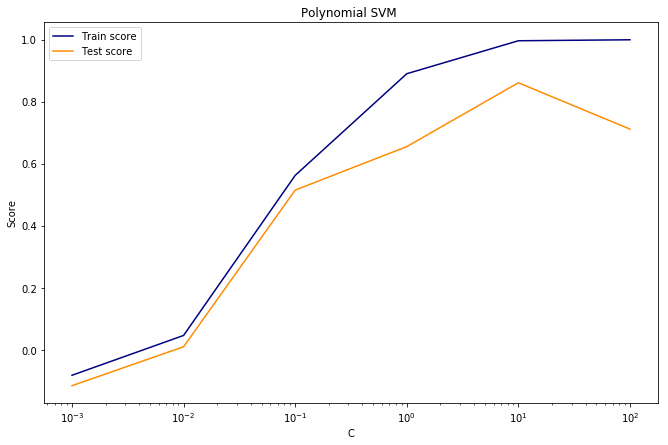

In [51]:
C = [0.001, 0.01, 0.1, 1, 10, 100]

polySVMGridSV_train = polySVMGridSV.cv_results_["mean_train_score"]
polySVMGridSV_test = polySVMGridSV.cv_results_["mean_test_score"]

plt.figure(figsize = (11,7))
plt.title('Polynomial SVM ')
plt.xlabel('C')
plt.ylabel('Score')
plt.semilogx(C, polySVMGridSV_train, label='Train score',
             color='navy')
plt.semilogx(C, polySVMGridSV_test,
             label='Test score', color='darkorange')

plt.legend(loc='best')
plt.show()

In [52]:
printGridResult(polySVMGridSV)
model_Scores.append({'Model Type' : 'Regression',
                    'Model Name' : 'Polynomial SVM',
                    'Parameters' : polySVMGridSV.best_params_,
                    'Training_score': polySVMGridSV.score(X_train, y_train),
                    'Test Score': polySVMGridSV.score(X_test, y_test )})

Best CV result: 0.8610919430058687
Best parameters: {'C': 10}
Training Score: 0.9970479759985823
Testing Score: 0.4212567115100121


In [53]:
modelResult = pd.DataFrame(model_Scores)
modelResult.set_index('Model Name', inplace = True)
modelResult

,Model Type,Parameters,Test Score,Training_score
Model Name,,,,
Linear Regression,Regression,-,4.865740e-01,7.754781e-01
SGD Regressor,Regression,"{'learning_rate': 'optimal', 'max_iter': 1000,...",-2.274651e+18,-8.065766e+19
Polynomial Regression,Regression,{'Degree': 2},9.985827e-01,9.582815e-01
Ridge Regression,Regression,{'alpha': 0.1},4.599559e-01,9.316140e-01
Lasso Regression,Regression,{'alpha': 0.001},4.536241e-01,9.250519e-01
KNN Regressor,Regression,{'n_neighbors': 1},1.347608e-01,1.000000e+00
Linear SVM,Regression,{'C': 100},4.380513e-01,8.564435e-01
SVM Radial,Regression,"{'C': 100, 'gamma': 0.01}",1.325977e-01,9.879893e-01
Polynomial SVM,Regression,{'C': 10},4.212567e-01,9.970480e-01


## Best model for Regression 

- As the ``polynomial regression`` with ``degree = 2`` gives us the best result for training and testing of the data

In [54]:
polyFinal = PolynomialFeatures(2)
X_train_poly = polyFinal.fit_transform(X_train)
X_test_poly = polyFinal.transform(X_test)
polyRegFinal = LinearRegression()
polyRegFinal.fit(X_train_poly,y_train)
poly_train = polyRegFinal.score(X_train_poly,y_train)
poly_Test = polyRegFinal.score(X_test_poly,y_test)
print('Train Score :' , poly_train)
print('Test Score :' , poly_Test)

Train Score : 1.0
Test Score : 0.9985827383348901


### ClassificationTasks

 #### Accuracy Method
    
As classification model is vulerable to missclassification. To reduce that  we want a good precision level that is (less false positive) and good recall (less false negative) So we need ``F1 score`` , ``AUC`` and ``Confusion matrix`` so that consolidately we can comment on the overall performance of the classification models. The ``higher`` the ``F1 Score`` better fit of the model 

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report,roc_auc_score
from sklearn.linear_model import LogisticRegression


In [56]:
cl_report = []

In [57]:
y_cl = audit_risk['Risk']
X_cl = audit_risk.drop('Risk',axis=1)
X_train_org_cl, X_test_org_cl, y_ctrain, y_ctest = train_test_split(X_cl, y_cl, random_state = 0)
scaler = StandardScaler()
scaler.fit(X_train_org_cl)
X_ctrain = scaler.transform(X_train_org_cl)
X_ctest = scaler.transform(X_test_org_cl)

In [58]:
X_ctrain.shape

(582, 32)

In [59]:
X_ctest.shape

(194, 32)

## KNN Classification

Parameter grid:
{'n_neighbors': [1, 3, 5, 10, 15, 20]}
Best parameters: {'n_neighbors': 15}
Training Score: 0.9656357388316151
Testing Score: 0.9742268041237113


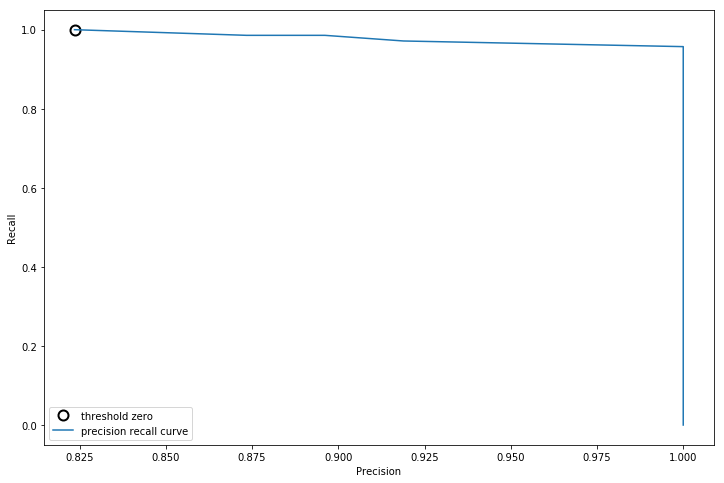

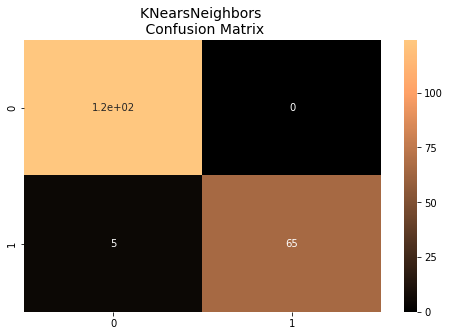

classification report               precision    recall  f1-score   support

           0       0.96      1.00      0.98       124
           1       1.00      0.93      0.96        70

   micro avg       0.97      0.97      0.97       194
   macro avg       0.98      0.96      0.97       194
weighted avg       0.98      0.97      0.97       194



In [60]:
knnClassifier = KNeighborsClassifier()
neighbors  = {'n_neighbors':[1,3,5,10,15,20]} 
print("Parameter grid:\n{}".format(neighbors))

knn_Grid = GridSearchCV(knnClassifier, param_grid=neighbors)
knn_Grid.fit(X_ctrain,y_ctrain)
print("Best parameters: {}".format(knn_Grid.best_params_))
print("Training Score: {}".format(knn_Grid.score(X_ctrain, y_ctrain)))
print("Testing Score: {}".format(knn_Grid.score(X_ctest, y_ctest)))

%matplotlib inline
y_knn_predict = knn_Grid.predict(X_ctest)
y_knn_train_predict = knn_Grid.predict(X_ctrain)
precision, recall, thresholds = precision_recall_curve(y_ctest,knn_Grid.predict_proba(X_ctest)[:, 1])

close_zero = np.argmin(np.abs(thresholds))
fig = plt.subplots(figsize = (12,8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()
#Confusion Matrix 
kneighbors_cf = confusion_matrix(y_ctest, knn_Grid.predict(X_ctest))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(kneighbors_cf,  annot=True, cmap=plt.cm.copper)
plt.title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, knn_Grid.predict(X_ctest)))

In [61]:
cl_report = [['KNN Clasifier ', 'k = 15', knn_Grid.score(X_ctrain, y_ctrain), knn_Grid.score(X_ctest, y_ctest), roc_auc_score(y_knn_train_predict, y_ctrain), roc_auc_score(y_knn_predict, y_ctest)]]

## Logistic Regression

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
Best parameters: {'C': 100, 'penalty': 'l2'}
Training Score: 0.9936034115138592
Testing Score: 0.9928057553956835


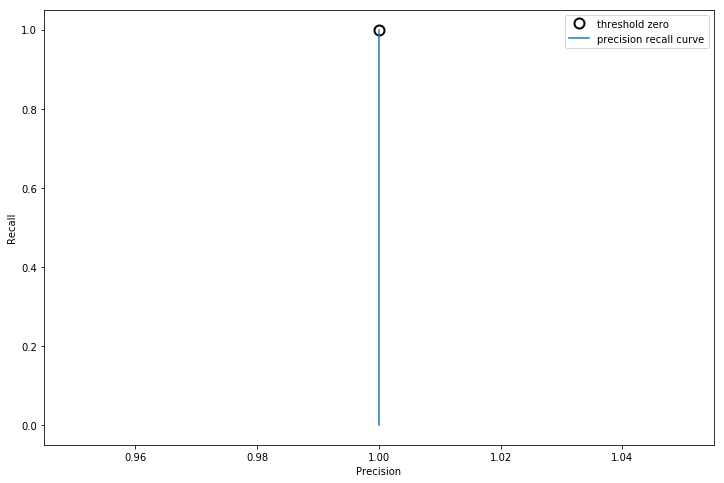

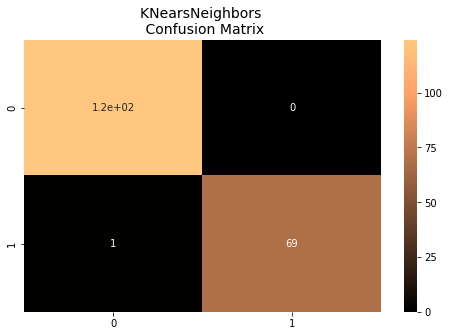

classification report               precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       1.00      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



In [62]:
logReg = LogisticRegression(random_state=0)
logisticParam  = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty' :['l1','l2']}
print("Parameter grid:\n{}".format(logisticParam))
logGrid = GridSearchCV(estimator = logReg, param_grid = logisticParam, cv=5, scoring= 'f1', return_train_score=True)

logGrid.fit(X_ctrain, y_ctrain)

print("Best parameters: {}".format(logGrid.best_params_))
print("Training Score: {}".format(logGrid.score(X_ctrain, y_ctrain)))
print("Testing Score: {}".format(logGrid.score(X_ctest, y_ctest)))

%matplotlib inline
y_log_predict = logGrid.predict(X_ctest)
y_log_train_predict = logGrid.predict(X_ctrain)
precision_log, recall_log, thresholds_log = precision_recall_curve(y_ctest,logGrid.decision_function(X_ctest))

close_zero = np.argmin(np.abs(thresholds_log))
fig = plt.subplots(figsize = (12,8))
plt.plot(precision_log[close_zero], recall_log[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_log, recall_log, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()
#Confusion Matrix 
logistic_cf = confusion_matrix(y_ctest, logGrid.predict(X_ctest))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(logistic_cf,  annot=True, cmap=plt.cm.copper)
plt.title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, logGrid.predict(X_ctest)))


In [63]:
cl_report = cl_report + [['Logistic Regression', logGrid.best_params_, logGrid.score(X_ctrain, y_ctrain), logGrid.score(X_ctest, y_ctest), roc_auc_score(y_log_train_predict, y_ctrain), roc_auc_score(y_log_predict, y_ctest)]]

## Linear SVM

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Best parameters: {'C': 100}
Training Score: 1.0
Testing Score: 0.9928057553956835


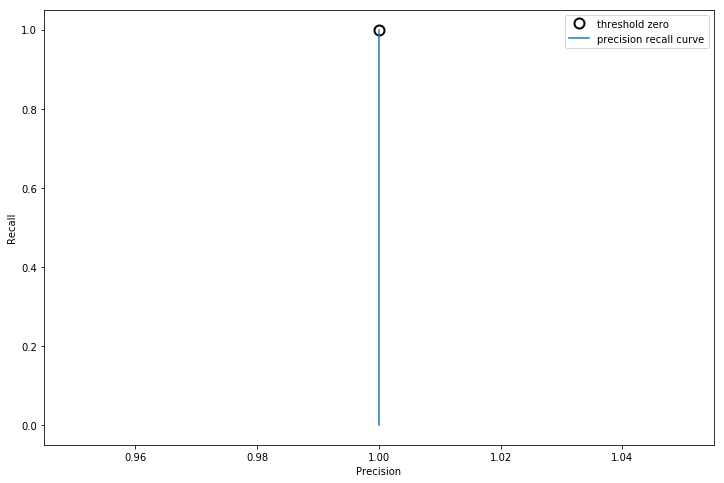

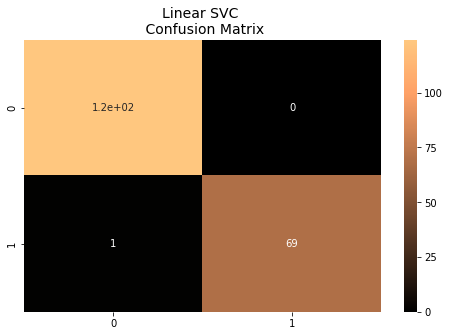

classification report               precision    recall  f1-score   support

           0       0.99      1.00      1.00       124
           1       1.00      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       1.00      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



In [64]:
from sklearn.svm import LinearSVC
linearSVC = LinearSVC(random_state=0)
linearsvc = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Parameter grid:\n{}".format(linearsvc))
linearSVCGrid = GridSearchCV(linearSVC, param_grid = linearsvc, cv=5, scoring='f1', return_train_score=True)

linearSVCGrid.fit(X_ctrain,y_ctrain)



print("Best parameters: {}".format(linearSVCGrid.best_params_))
print("Training Score: {}".format(linearSVCGrid.score(X_ctrain, y_ctrain)))
print("Testing Score: {}".format(linearSVCGrid.score(X_ctest, y_ctest)))

%matplotlib inline
y_lsvc_predict = linearSVCGrid.predict(X_ctest)
y_lsvc_train_predict = linearSVCGrid.predict(X_ctrain)
precision_lsvc, recall_lsvc, thresholds_lsvc = precision_recall_curve(y_ctest,linearSVCGrid.decision_function(X_ctest))

close_zero = np.argmin(np.abs(thresholds_lsvc))
fig = plt.subplots(figsize = (12,8))
plt.plot(precision_lsvc[close_zero], recall_lsvc[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision_lsvc, recall_lsvc, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()
#Confusion Matrix 
lsvc_cf = confusion_matrix(y_ctest, linearSVCGrid.predict(X_ctest))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(lsvc_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Linear SVC \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, linearSVCGrid.predict(X_ctest)))


In [65]:
cl_report = cl_report + [['Linear SVM', linearSVCGrid.best_params_, linearSVCGrid.score(X_ctrain, y_ctrain), linearSVCGrid.score(X_ctest, y_ctest), roc_auc_score(y_log_train_predict, y_ctrain), roc_auc_score(y_log_predict, y_ctest)]]

## SVM Radial Kernel

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.1}
Training Score: 1.0
Testing Score: 0.9857142857142858
Train roc_auc_score: 1.00
Test roc_auc_score: 1.00 


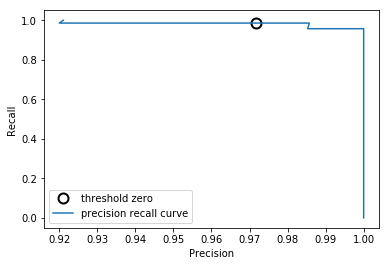

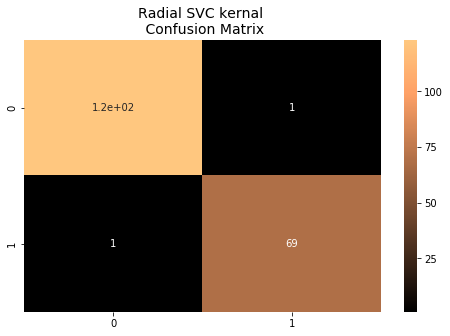

classification report               precision    recall  f1-score   support

           0       0.99      0.99      0.99       124
           1       0.99      0.99      0.99        70

   micro avg       0.99      0.99      0.99       194
   macro avg       0.99      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



In [66]:
from sklearn.svm import SVC
radialSVC = SVC(kernel = 'rbf',random_state=0)
radialSVCParam = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(radialSVCParam))
radialSVCGrid = GridSearchCV(radialSVC, param_grid = radialSVCParam, cv=5,scoring='f1', return_train_score=True)
radialSVCGrid.fit(X_ctrain, y_ctrain)

print("Best parameters: {}".format(radialSVCGrid.best_params_))
print("Training Score: {}".format(radialSVCGrid.score(X_ctrain, y_ctrain)))
print("Testing Score: {}".format(radialSVCGrid.score(X_ctest, y_ctest)))

y_radsvc_predict = radialSVCGrid.predict(X_ctest)
y_radsvc_train_predict = radialSVCGrid.predict(X_ctrain)
print('Train roc_auc_score: %.2f'%roc_auc_score(y_radsvc_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_radsvc_predict, y_test))

precision_rdS, recall_rdS, thresholds_rdS = precision_recall_curve(y_ctest, radialSVCGrid.decision_function(X_ctest))
close_zero = np.argmin(np.abs(thresholds_rdS))
plt.plot(precision_rdS[close_zero], recall_rdS[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision_rdS, recall_rdS, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

#Confusion Matrix 
radialSCV_cf = confusion_matrix(y_ctest, radialSVCGrid.predict(X_ctest))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(radialSCV_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Radial SVC kernal \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, radialSVCGrid.predict(X_ctest)))


In [67]:
cl_report = cl_report + [['Radial SVC ', radialSVCGrid.best_params_, radialSVCGrid.score(X_ctrain, y_ctrain), radialSVCGrid.score(X_ctest, y_ctest), roc_auc_score(y_radsvc_train_predict, y_ctrain), roc_auc_score(y_radsvc_predict, y_ctest)]]

## Polynomial SVC 

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 10}
Training Score: 0.9559471365638766
Testing Score: 0.9402985074626866


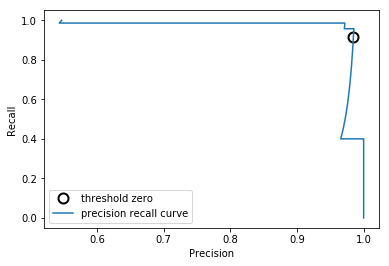

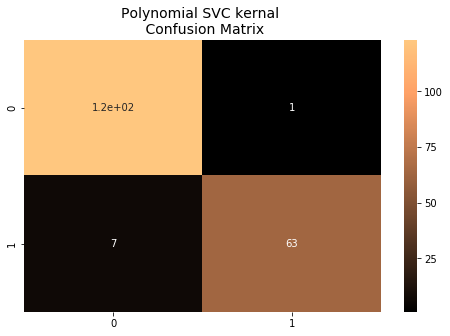

classification report               precision    recall  f1-score   support

           0       0.95      0.99      0.97       124
           1       0.98      0.90      0.94        70

   micro avg       0.96      0.96      0.96       194
   macro avg       0.97      0.95      0.95       194
weighted avg       0.96      0.96      0.96       194



In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
polySVC = SVC(kernel = 'poly', degree = 2,random_state=0)
polySVCparam = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(polySVCparam))
polySVCGrid = GridSearchCV(polySVC, param_grid = polySVCparam, scoring='f1', cv=5, return_train_score=True)

polySVCGrid.fit(X_ctrain, y_ctrain)

print("Best parameters: {}".format(polySVCGrid.best_params_))
print("Training Score: {}".format(polySVCGrid.score(X_ctrain, y_ctrain)))
print("Testing Score: {}".format(polySVCGrid.score(X_ctest, y_ctest)))

y_polySVC_predict = polySVCGrid.predict(X_ctest)
y_polySVC_train_predict = polySVCGrid.predict(X_ctrain)


precision_poly, recall_poly, thresholds_poly = precision_recall_curve(y_ctest, polySVCGrid.decision_function(X_ctest))
close_zero = np.argmin(np.abs(thresholds_poly))
plt.plot(precision_poly[close_zero], recall_poly[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision_poly, recall_poly, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

polySVC_cf = confusion_matrix(y_ctest, polySVCGrid.predict(X_ctest))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(polySVC_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Polynomial SVC kernal \n Confusion Matrix", fontsize=14)
plt.show()

print ("classification report", classification_report(y_ctest, polySVCGrid.predict(X_ctest)))



In [69]:
cl_report = cl_report + [['Polynomial SVC ', polySVCGrid.best_params_, polySVCGrid.score(X_ctrain, y_ctrain), polySVCGrid.score(X_ctest, y_ctest), roc_auc_score(y_polySVC_train_predict, y_ctrain), roc_auc_score(y_polySVC_predict, y_ctest)]]

## Decision Tree 

Parameter grid:
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']}
Best parameters: {'criterion': 'gini', 'max_depth': 1}
Training Score: 1.0
Testing Score: 1.0


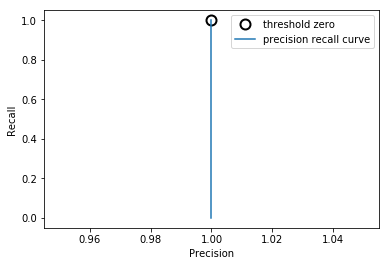

In [70]:
from sklearn.tree import DecisionTreeClassifier
decisionTree  = DecisionTreeClassifier(random_state=0)
dtreeparam = {'max_depth': [1,2,3,4,5,6,7,8, 9, 10], 'criterion': ['gini','entropy']}
print("Parameter grid:\n{}".format(dtreeparam))
decisionTreeGrid = GridSearchCV(decisionTree, param_grid = dtreeparam, cv=5,scoring='f1',return_train_score=True)

decisionTreeGrid.fit(X_ctrain, y_ctrain)

print("Best parameters: {}".format(decisionTreeGrid.best_params_))
print("Training Score: {}".format(decisionTreeGrid.score(X_ctrain, y_ctrain)))
print("Testing Score: {}".format(decisionTreeGrid.score(X_ctest, y_ctest)))


y_dtree_predict = decisionTreeGrid.predict(X_ctest)
y_dtree_train_predict = decisionTreeGrid.predict(X_ctrain)

precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_ctest, decisionTreeGrid.predict_proba(X_ctest)[:,1])
close_zero = np.argmin(np.abs(thresholds_tree))
plt.plot(precision_tree[close_zero], recall_tree[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision_tree, recall_tree, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()



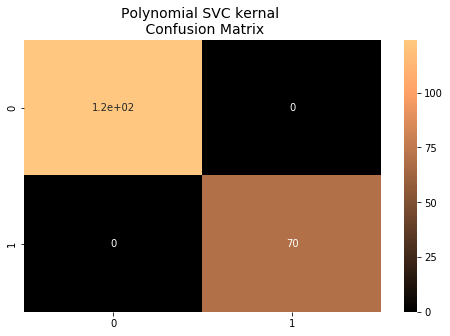

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00        70

   micro avg       1.00      1.00      1.00       194
   macro avg       1.00      1.00      1.00       194
weighted avg       1.00      1.00      1.00       194



In [71]:
dtree_cf = confusion_matrix(y_ctest, decisionTreeGrid.predict(X_ctest))
fig = plt.subplots(figsize=(8,5))
sns.heatmap(dtree_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Polynomial SVC kernal \n Confusion Matrix", fontsize=14)
plt.show()
print ("classification report", classification_report(y_ctest, decisionTreeGrid.predict(X_ctest)))


In [72]:
cl_report = cl_report + [['Decision Tree', decisionTreeGrid.best_params_, decisionTreeGrid.score(X_ctrain, y_ctrain), decisionTreeGrid.score(X_ctest, y_ctest), roc_auc_score(y_dtree_train_predict, y_ctrain), roc_auc_score(y_dtree_predict, y_ctest)]]

In [73]:
classificationReport = pd.DataFrame(cl_report, columns=['Model', 'Best Params', 'F1-Train', 'F1-Test', 'AUC-Train', 'AUC-Test'])

In [74]:
classificationReport

,Model,Best Params,F1-Train,F1-Test,AUC-Train,AUC-Test
0,KNN Clasifier,k = 15,0.965636,0.974227,0.969667,0.980620
1,Logistic Regression,"{'C': 100, 'penalty': 'l2'}",0.993603,0.992806,0.994990,0.996000
2,Linear SVM,{'C': 100},1.000000,0.992806,0.994990,0.996000
3,Radial SVC,"{'C': 100, 'gamma': 0.1}",1.000000,0.985714,1.000000,0.988825
4,Polynomial SVC,{'C': 10},0.955947,0.940299,0.970640,0.965264
5,Decision Tree,"{'criterion': 'gini', 'max_depth': 1}",1.000000,1.000000,1.000000,1.000000


## Conclusion 
- Decision Tree is good for fit of data because both the training and testing scores are 1.0, which means they are 100% correctly classified.